In [1]:
import numpy as np
import matplotlib.pyplot as plt

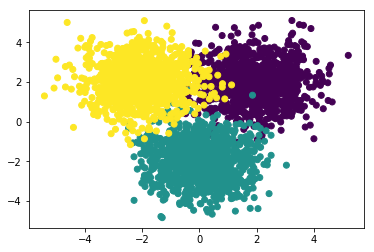

In [2]:
D = 2
K = 3
N = K*1000

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.scatter(X[:,0],X[:,1],c = y)

In [3]:
def d_squared(u,v):
    l =[]
    for i in range(0,len(v)):
        l.append((u-v[i]).T.dot(u-v[i]))
    l = np.asarray(l)
    l = l.reshape(len(l), 1)
    return l

def nearestNeighboor(xnew,x,y):
    predictedY = []
    for i in range(0, len(xnew)):
        predictedY.append(y[np.argmin(d_squared(xnew[i], x))])
    return predictedY

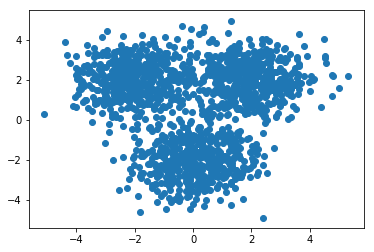

In [4]:
X0 = np.random.randn((N//K//2),D) + np.array([2,2])
X1 = np.random.randn((N//K//2),D) + np.array([0,-2])
X2 = np.random.randn((N//K//2),D) + np.array([-2,2])
Xnew = np.vstack((X0,X1,X2))
plt.scatter(Xnew[:,0],Xnew[:,1])

In [5]:
predictedY = nearestNeighboor(Xnew,X,y)

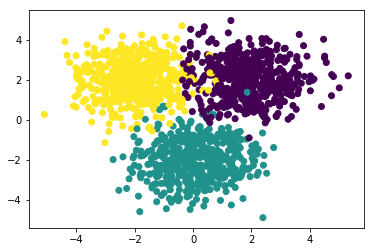

In [6]:
plt.scatter(Xnew[:,0],Xnew[:,1], c = predictedY)

In [7]:
def kNearestNeighboors(xnew,x,y,K):
    predictedY = []
    for i in range(0, len(xnew)):
        knn = np.argsort(d_squared(xnew[i], x), axis = 0)[:K]
        uniq, counts = np.unique(y[knn], return_counts=True)
        predictedY.append(uniq[modargmax(counts)])
                
    return predictedY

In [8]:
def modargmax(x):
    csorted = np.sort(x)
    indsorted = np.argsort(x)
    if len(csorted)>1:
        if csorted[len(csorted)-1] == csorted[len(csorted)-2]:
            return indsorted[-(int(np.round(np.random.rand()))+1)]
        else:
            return indsorted[len(csorted)-1]

In [9]:
K = 30
predictedY = kNearestNeighboors(Xnew,X,y,K)
predictedY = np.asarray(predictedY)

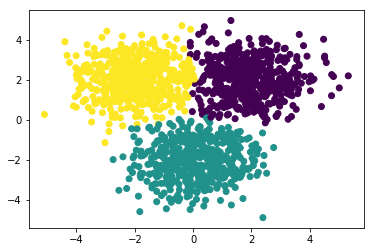

In [10]:
plt.scatter(Xnew[:,0],Xnew[:,1], c = predictedY)

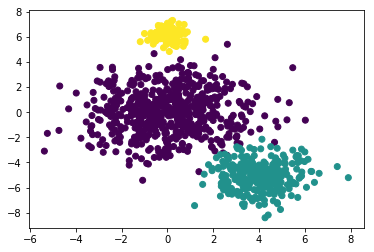

In [11]:
N = 1000
D = 2

Xnewnew = np.zeros((N,D))
Xnewnew[:600, :] = np.random.randn(600,D)*1.7
Xnewnew[600:900,:] = np.random.randn(300,D)+np.array ([4,-5])
Xnewnew[900:1000,:] = np.random.randn(100,D)/2+np.array ([0,6])
y = np.array([0]*600 + [1]*300 + [2]*100)

plt.figure()
plt.scatter(Xnewnew[:,0], Xnewnew[:,1],c = y)

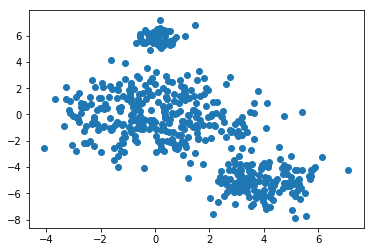

In [12]:
N = 500
D = 2

Xnewnewnew = np.zeros((N,D))
Xnewnewnew[:300, :] = np.random.randn(300,D)*1.7
Xnewnewnew[300:450,:] = np.random.randn(150,D)+np.array ([4,-5])
Xnewnewnew[450:500,:] = np.random.randn(50,D)/2+np.array ([0,6])


plt.figure()
plt.scatter(Xnewnewnew[:,0], Xnewnewnew[:,1])

In [13]:
def weightedkNearestNeighboors(xnew,x,y,K):
    predictedY = []
    for i in range(0, len(xnew)):
        c = 1/sort(d_squared(xnew[i], x), axis = 0)[:K]
        knn = np.argsort(d_squared(xnew[i], x), axis = 0)[:K]
        uniq, counts = np.unique(y[knn], return_counts=True)
        w = np.zeros((len(np.unique(y[knn]),2)))          
        for j in range(0,len(np.unique(y[knn]))):
            w[j,0] = y[knn[j]]
        for j in range(0,len(knn)):
            if y[knn[j]] == w[j,0]:
                w[j,0] += c[j]
        predictedY.append(w[modargmax(w[:,0], axis = 1),1])
                
    return predictedY

In [14]:
K = 30
predictedY = kNearestNeighboors(Xnewnewnew,Xnewnew,y,K)
predictedY = np.asarray(predictedY)

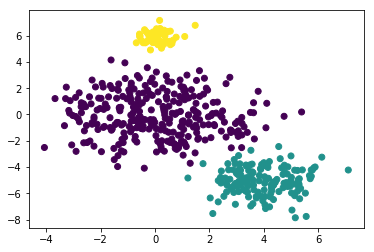

In [15]:
plt.scatter(Xnewnewnew[:,0],Xnewnewnew[:,1], c = predictedY)